# Step 1: Load the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc , confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB

# Step 2: Load the data & Investigate

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape


(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# check for missing values and plot
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# check for any cloumns with zero values
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
# all the records where Glucose is zero
data[data.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
# Check shape


In [ ]:
# corr() and heat map

In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


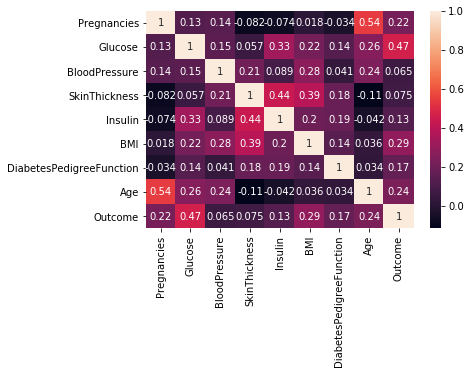

In [12]:
sns.heatmap(data.corr(), annot=True)

# Step 3: Numerical Variable analysis

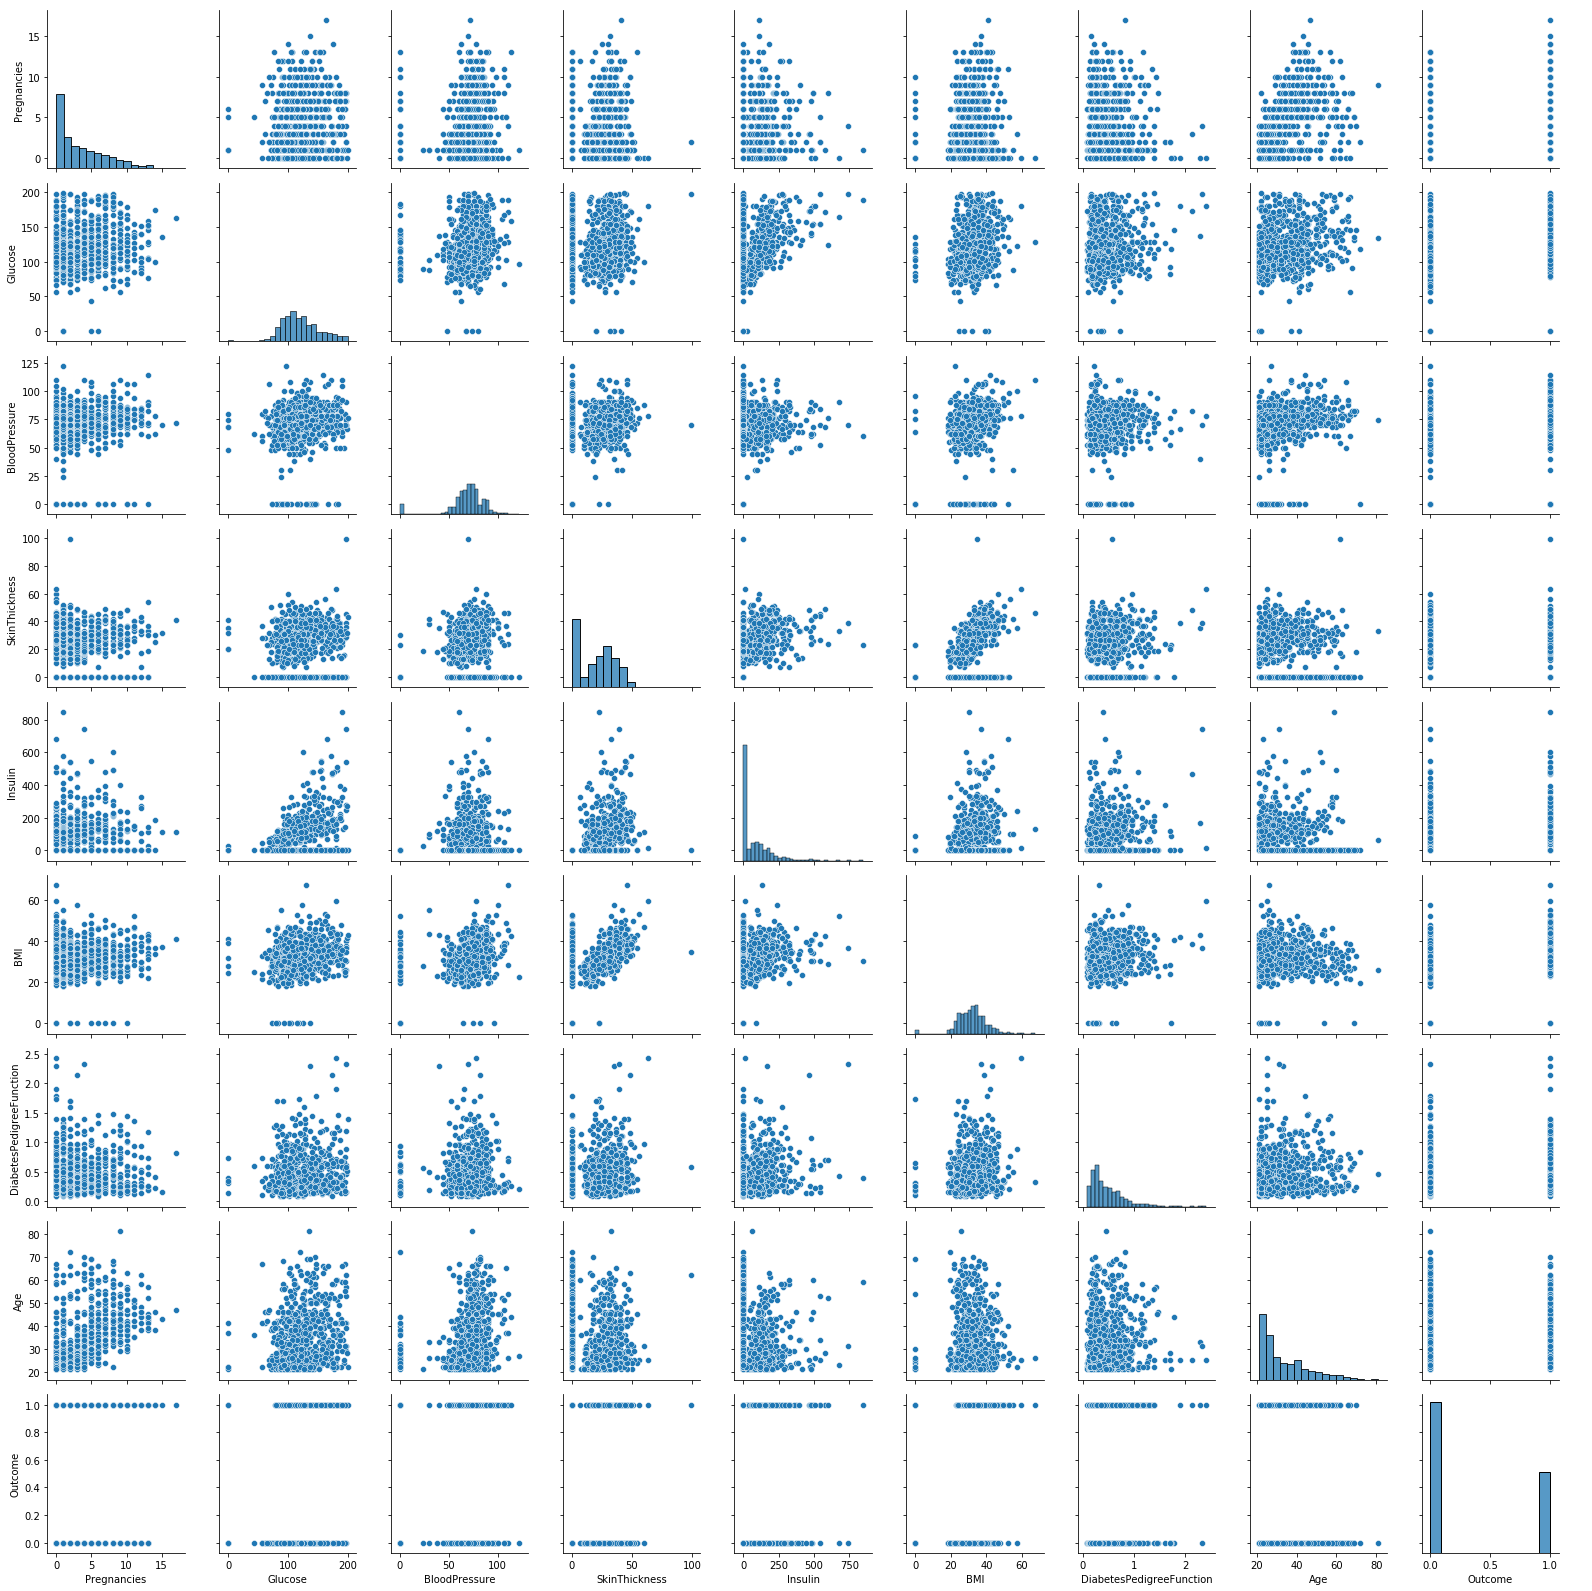

In [13]:
sns.pairplot(data)

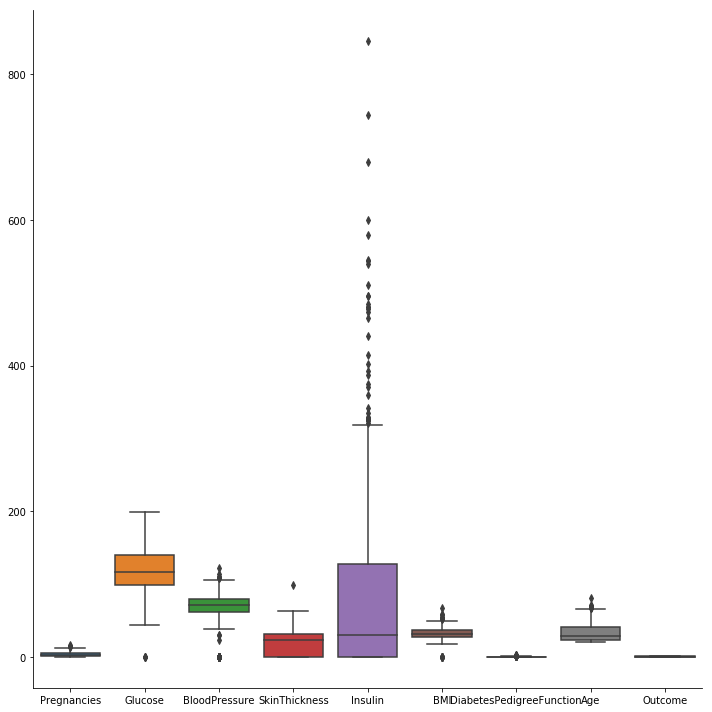

In [14]:
sns.catplot(kind = 'box', data=data, height=10)

<Figure size 1080x504 with 0 Axes>

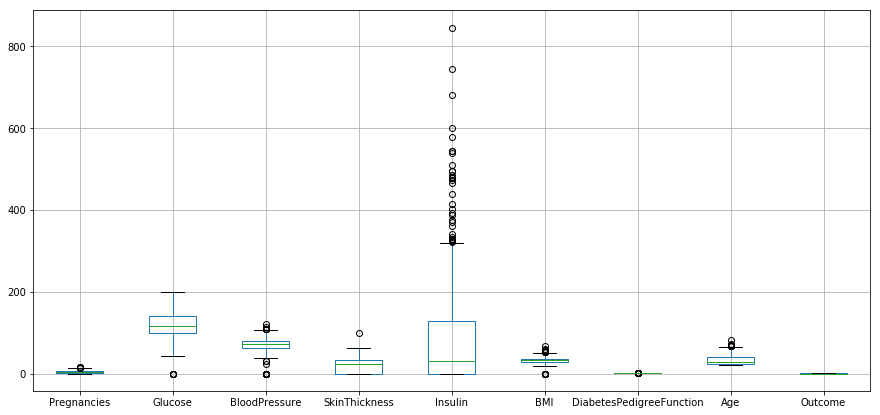

In [15]:
plt.figure(figsize=(15,7))
data.boxplot()

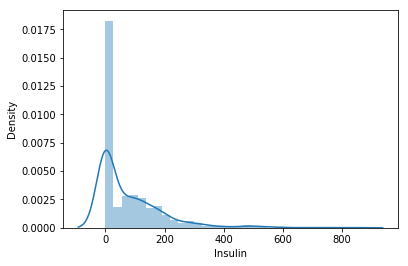

In [16]:
sns.distplot(data.Insulin)

# Step 4: Model building

In [17]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
feature_cols= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [20]:
X=data[feature_cols]
y = data.Outcome

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [22]:
gnbmodel = GaussianNB()

In [23]:
gnbmodel.fit(X_train, y_train)

GaussianNB()

In [24]:
pred_train = gnbmodel.predict(X_train)
pred_test = gnbmodel.predict(X_test)

In [25]:
confusion_matrix(y_train, pred_train)

array([[336,  61],
       [ 88, 129]], dtype=int64)

In [26]:
confusion_matrix(y_test, pred_test)

array([[83, 20],
       [18, 33]], dtype=int64)

In [27]:
accuracy_score(y_test, pred_test)

0.7532467532467533

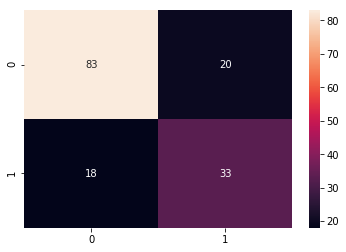

In [28]:
sns.heatmap(confusion_matrix(y_test, pred_test), annot=True)

In [29]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       397
           1       0.68      0.59      0.63       217

    accuracy                           0.76       614
   macro avg       0.74      0.72      0.73       614
weighted avg       0.75      0.76      0.75       614



In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()

In [32]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [33]:
pred_train_LR = logmodel.predict(X_train)

In [34]:
print(classification_report(y_train, pred_train_LR))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       397
           1       0.74      0.57      0.65       217

    accuracy                           0.78       614
   macro avg       0.77      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



In [35]:
pred_train_LR = logmodel.predict(X_test)

In [36]:
accuracy_score(y_test, pred_train_LR)

0.7987012987012987

In [37]:
data[data.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [38]:
data.Glucose.mean()

120.89453125

In [39]:
data['Glucose'] = data.Glucose.replace(0, np.NaN)

In [40]:
data['Glucose'].fillna(data.Glucose.mean(), inplace=True)

In [48]:
a = []
for col in data:
    if ((data[col]==0).sum() > 0):
        if col != 'Outcome':
            a.append(col)
        

In [49]:
zero_cols = a[1:] # Because 0 value in Pregnancies is valid

In [50]:
zero_cols

['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [51]:
for column in zero_cols:
    data[column] = data[column].replace(0, np.NaN)
    data[column].fillna(data[column].mean(), inplace=True)
    
    

In [52]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction']

In [53]:
X = data[feature_cols]

In [54]:
y = data.Outcome

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [56]:
gnbmodel = GaussianNB()

In [57]:
gnbmodel.fit(X_train, y_train)

GaussianNB()

In [58]:
pred_train_2 = gnbmodel.predict(X_train)
pred_test_2 = gnbmodel.predict(X_test)

In [59]:
accuracy_score(y_train, pred_train_2)

0.754071661237785

In [60]:
accuracy_score(y_test, pred_test_2)

0.7532467532467533

In [61]:
confusion_matrix(y_train, pred_train_2)

array([[337,  60],
       [ 91, 126]], dtype=int64)

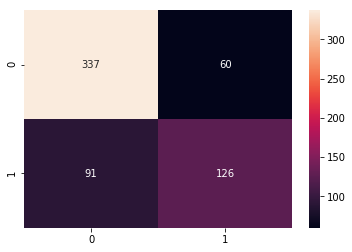

In [64]:
sns.heatmap(confusion_matrix(y_train, pred_train_2), annot=True, fmt='g')

# Model building after replacing the Zeros

In [65]:
from sklearn.datasets import make_classification
# n_samplesint The number of samples.

# n_features The total number of features. 

# n_informative The number of informative features. 
# Each class is composed of a number of gaussian clusters, informative features are drawn independently from N(0, 1)
# and then randomly linearly combined within each cluster.

# n_redundant
# The number of redundant features. These features are generated as random linear combinations of the informative features.
nb_samples = 300
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

In [68]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
# alpha: float, optional (default=1.0) :
#  Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
# is a technique used to smooth categorical data

# binarize: float or None, optional :

# Threshold for binarizing (mapping to booleans) of sample features.
# If None, input is presumed to already consist of binary vectors.

# fit_prior: boolean :
# Whether to learn class prior probabilities or not. If false, a uniform prior will be used
# before making reference to certain relevant observations

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

BernoulliNB()

0.9333333333333333